<a href="https://colab.research.google.com/github/salaxqb/age_gender_detection/blob/main/AGEGENDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
from keras.utils.data_utils import get_file


(-0.5, 47.5, 47.5, -0.5)

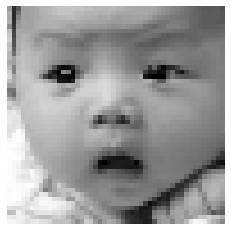

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
df=pd.read_csv("/content/drive/MyDrive/age_gender.csv")
df.head()
df1= pd.DataFrame(df)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][1]
im
plt.imshow(im, cmap='gray')
plt.axis('off')

In [3]:
X = np.zeros(shape=(23705,48,48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]
X.dtype
ag = df1['age']
ag=ag.astype(float)
ag= np.array(ag)

In [4]:
g= df1['gender']
g=np.array(g)

In [5]:
labels_f =[]

i=0

while i <len(ag):

  label=[]

  label.append([ag[i]])

  label.append([g[i]])

  labels_f.append(label)

  i+=1

labels_f =np.array(labels_f)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(X,labels_f,test_size=0.25)


In [8]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [9]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten,BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D

from tensorflow.keras.layers import Input,Activation,Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam

In [10]:
def Convolution(input_tensor,filters):

    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)

    x = Dropout(0.1)(x)

    x= Activation('relu')(x)

    return x

def model(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,128)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,256)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  flatten= Flatten() (maxp_4)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  drop_1=Dropout(0.2)(dense_1)

  drop_2=Dropout(0.2)(dense_2)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)

  output_2= Dense(1,activation="relu",name='age_out')(drop_2)

  model = Model(inputs=[inputs], outputs=[output_1,output_2])

  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [11]:
Model=model((48,48,1))
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [12]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=5)

Epoch 1/5
278/278 [==============================] - 139s 495ms/step - loss: 17.1784 - sex_out_loss: 0.6937 - age_out_loss: 16.3041 - sex_out_accuracy: 0.5341 - age_out_accuracy: 0.0449 - val_loss: 17.3126 - val_sex_out_loss: 0.6901 - val_age_out_loss: 16.4606 - val_sex_out_accuracy: 0.5180 - val_age_out_accuracy: 0.0531
Epoch 2/5
278/278 [==============================] - 137s 494ms/step - loss: 15.4254 - sex_out_loss: 0.6795 - age_out_loss: 14.5741 - sex_out_accuracy: 0.5460 - age_out_accuracy: 0.0454 - val_loss: 16.2414 - val_sex_out_loss: 0.6321 - val_age_out_loss: 15.3995 - val_sex_out_accuracy: 0.6998 - val_age_out_accuracy: 0.0531
Epoch 3/5
278/278 [==============================] - 138s 495ms/step - loss: 12.7613 - sex_out_loss: 0.5992 - age_out_loss: 11.9031 - sex_out_accuracy: 0.6549 - age_out_accuracy: 0.0429 - val_loss: 15.4542 - val_sex_out_loss: 0.5626 - val_age_out_loss: 14.6015 - val_sex_out_accuracy: 0.7223 - val_age_out_accuracy: 0.0479
Epoch 4/5
278/278 [============

In [13]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 9s 47ms/step - loss: 11.5343 - sex_out_loss: 0.5206 - age_out_loss: 10.6564 - sex_out_accuracy: 0.7474 - age_out_accuracy: 0.0525


[11.534280776977539,
 0.5206249356269836,
 10.656378746032715,
 0.7474270462989807,
 0.05247173830866814]

In [14]:
pred=Model.predict(X_test)
pred[1]

array([[43.90391 ],
       [27.81261 ],
       [22.928574],
       ...,
       [28.99001 ],
       [27.110086],
       [21.62365 ]], dtype=float32)

Predicted Age: 23
Predicted Sex: Male


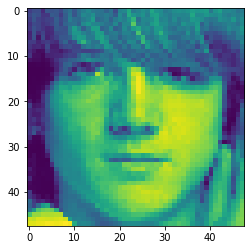

In [19]:
def test_image(ind,X,Model):

  plt.imshow(X[ind])

  image_test=X[ind]

  pred_1=Model.predict(np.array([image_test]))

  sex_f=['Female','Male']

  age=int(np.round(pred_1[1][0]))

  sex=int(np.round(pred_1[0][0]))

  print("Predicted Age: "+ str(age))

  print("Predicted Sex: "+ sex_f[sex])

test_image(1922,X, Model)